In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('play_decision_data.csv')

In [19]:
df

,Day,outlook,temp,humidity,windy,play
0,1,sunny,hot,high,False,no
1,2,sunny,hot,high,True,no
2,3,overcast,hot,high,False,yes
3,4,rainy,mild,high,False,yes
4,5,rainy,cool,normal,False,yes
5,6,rainy,cool,normal,True,no
6,7,overcast,cool,normal,True,yes
7,8,sunny,mild,high,False,no
8,9,sunny,cool,normal,False,yes
9,10,rainy,mild,normal,False,yes


In [20]:
df['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [21]:
df['temp'].unique()

array(['hot', 'mild', 'cool'], dtype=object)

In [22]:
df['humidity'].unique()

array(['high', 'normal'], dtype=object)

In [23]:
df['windy'].unique()

array([False,  True])

In [24]:
outlook_map = {
    'sunny': 0,
    'overcast': 1,
    'rainy': 2
}

temp_map = {
    'hot': 0,
    'mild': 1,
    'cool': 2
}

humidity_map = {
    'high': 0,
    'normal': 1
}

windy_map = {
    False: 0,
    True: 1
}

In [25]:
df['outlook'] = df['outlook'].map(outlook_map)
df['temp'] = df['temp'].map(temp_map)
df['humidity'] = df['humidity'].map(humidity_map)
df['windy'] = df['windy'].map(windy_map)
df

,Day,outlook,temp,humidity,windy,play
0,1,0,0,0,0,no
1,2,0,0,0,1,no
2,3,1,0,0,0,yes
3,4,2,1,0,0,yes
4,5,2,2,1,0,yes
5,6,2,2,1,1,no
6,7,1,2,1,1,yes
7,8,0,1,0,0,no
8,9,0,2,1,0,yes
9,10,2,1,1,0,yes


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['play']=le.fit_transform(df['play'])

In [27]:
df

,Day,outlook,temp,humidity,windy,play
0,1,0,0,0,0,0
1,2,0,0,0,1,0
2,3,1,0,0,0,1
3,4,2,1,0,0,1
4,5,2,2,1,0,1
5,6,2,2,1,1,0
6,7,1,2,1,1,1
7,8,0,1,0,0,0
8,9,0,2,1,0,1
9,10,2,1,1,0,1


In [28]:
X = df.iloc[:, 1:-1]

In [30]:
y = df.iloc[:,-1]

In [31]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

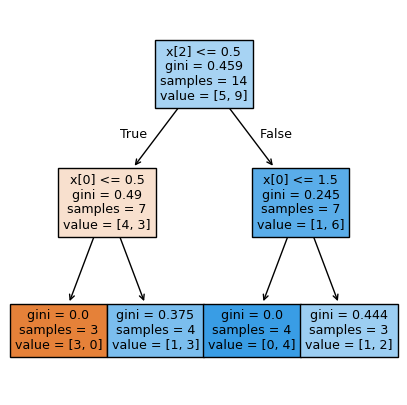

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plot_tree(dt, filled=True)